# HDS assignment
## Assignment A

#### Introduction

* This report will be split into 2 parts. Function part which is about all the functions used and explain how they work, and the execution part where I executed the functions to get the answer of the questions and describe findings.

For this assignment, while solving each questions, I will be reading csv files individually to ensure the independency of the data as well as to avoid confusion while working with same pandas frame.

Even though, sometimes csv files will be read repetitively, it has following advantages. 

* It will prevent modified data from different quesitons being used. 

* Also, it will allow code of each question to be executed independently to improve performance while testing.

So, I decide to sacrifice the overall performance to decouple the functions and ensure they don't have dependency. 

I also used functions to modularise the problem to make the code more readable. All functions will be presented in this report first, all of the execution and final results of the questions will be at the end of this report. 

All of the answeres will be printed instead of being returned by a function due to the reason that no further requirement of processing the results is shown in the assignment brief. For the visualisation convinence, I chose to print the results. However, results can be returned by adding a return statement function. Multiple results produced by one function can be zipped into tuple, list or other viable data structure and returned as one object. 


#### Global variable and Library import

First, I need to import framework used and assign the path of csv files that this project is going to use to global variables.

* practiceNameFile is for retriving information abot practice code. 
* presFile is for retriving information about prescription.
* patiFile is for retriving information about patients.

In [5]:
import pandas as pd

practicesName = "T201804ADDR+BNFT.CSV"
columnNamePrac = ['code','surgury','surgery','address','city','county','postcode']
presFile = "T201804PDPI+BNFT.CSV"
patiFile = "gp-reg-pat-prac-all.csv"


### Function Part:

This is a function to read csv into pandas frame for all the questions to use. 

In [6]:
def readToPandas(name,columnName):
    if(columnName==None):
        pandasInfo = pd.read_csv(name)
    else:
        pandasInfo = pd.read_csv(name,skiprows=1, names =columnName)
    return pandasInfo

#### Q1.
Identify all GP practices located in London. For those practices, describe:

* the total number of patients registered
* the total number of prescriptions
* the total actual cost of these prescriptions (using the ACT COST column)
* the top 10 most frequent drugs prescribed
* the bottom 10 less frequent drugs prescribed


Question 1 and 2 retrieves data about a certain range of practices and their patient number as well as prescription details. 

This is the function for retriving a list of practice's code in a city.
practiceInfo will be a dataframe retrieved from the csv file and city will be a string of the city's name. (Eg. 'London', 'Cambridge')

In [62]:
# return london practice code as list
def getCityPractice(practiceInfo,city):
    practiceInfo['city'] = practiceInfo['city'].str.strip()
    practiceInfo['county'] = practiceInfo['county'].str.strip()
    cityPrac = practiceInfo.loc[(practiceInfo['city'] == city) | (practiceInfo['county'] == city)]
    cityPracList = cityPrac['code'].tolist()
    return cityPracList



This is the function for getting the total number of patients, given a list of practice's codes. 

(parameter Q is the question number, irrelevant to the logic of the code)

In [63]:
# get total patient number related to the practiselist
def getPatientNumber(practiceList,Q):
    pati = readToPandas(patiFile,None)
    patiNumDict = dict(zip(pati.CODE, pati.NUMBER_OF_PATIENTS))
    sum = 0
    errorList = []
    for paticode in practiceList:
        if(paticode in patiNumDict.keys()):
            sum = sum + patiNumDict[paticode]
        else:
            errorList.append(paticode)
    print('Q'+str(Q)+' 1).total num of patients: ' + str(sum))
    print('      doesnt exist practice: ' + str(errorList))


This is the function for getting the total prescriptions, given a list of the practice's codes.

In [43]:
def getTotalPres(practiceList,Q):
    presColumn = [' SHA', 'PCT', 'PRACTICE', 'BNF CODE', 'BNF NAME', 'ITEMS  ', 'NIC', 'ACT_COST', 'QUANTITY', 'PERIOD',
                  'Null']
    presInfo = readToPandas(presFile,presColumn)
    presQuantity = presInfo[['PRACTICE', 'QUANTITY']]
    presQuantity = presQuantity.loc[presQuantity['PRACTICE'].isin(practiceList)][['PRACTICE','QUANTITY']]
    presQuantity = presQuantity[['PRACTICE', 'QUANTITY']]
    sum  = presQuantity['QUANTITY'].sum()
    print('Q'+str(Q)+' 2).total num of prescription : ' + str(sum))


This is the function for getting the total cost of all the prescriptions, given a list of the practice's codes.

In [44]:
def getTotalPresCost(practiceList,Q):
    presColumn = [' SHA', 'PCT', 'PRACTICE', 'BNF CODE', 'BNF NAME', 'ITEMS  ', 'NIC', 'ACT_COST', 'QUANTITY', 'PERIOD',
                  'Null']

    presInfo = readToPandas(presFile, presColumn)
    presCost = presInfo[['PRACTICE','QUANTITY', 'ACT_COST']]
    presCost = presCost.loc[presCost['PRACTICE'].isin(practiceList)][['PRACTICE', 'QUANTITY','ACT_COST']]
    presCost = presCost[['PRACTICE', 'QUANTITY','ACT_COST']]

    presCost['TOTAL_COST'] = presCost['QUANTITY']*presCost['ACT_COST']

    sum = presCost['TOTAL_COST'].sum()
    print('Q'+str(Q)+' 3).total cost of prescription : ' + str(sum))


This is the function presenting the bottom 10 and the top 10 biggest quantity(most frequently used) prescriptions, given a list of the practice's codes. 

In [45]:
def getFrequencyOfPres(practiceList,Q):
    presColumn = [' SHA', 'PCT', 'PRACTICE', 'BNF_CODE', 'BNF_NAME', 'ITEMS  ', 'NIC', 'ACT_COST', 'QUANTITY', 'PERIOD',
                  'Null']
    presInfo = readToPandas(presFile, presColumn)
    presFreq = presInfo[['PRACTICE','BNF_NAME','QUANTITY']]
    presFreqLn = presFreq.loc[presFreq['PRACTICE'].isin(practiceList)][['BNF_NAME','QUANTITY']]
    presFreqLn  = presFreqLn[['BNF_NAME','QUANTITY']]
    presFreqLn = presFreqLn.groupby('BNF_NAME').sum()
    presFreqLn = presFreqLn.sort_values('QUANTITY')


    print('Q'+str(Q)+' 4).most frequently used prescription : ' )
    print(presFreqLn.nlargest(10,'QUANTITY'))
    print('\n\n')
    print('Q'+str(Q)+' 4).least frequently used prescription : : ' )
    print(presFreqLn.nsmallest(10,'QUANTITY'))
    print('\n\n')


    # print(presFreqLn)


#### Q2.
Identify all GP practices located in Cambridge. For those practices, describe:
o the total number of patients registered
o the total number of prescriptions
o the total actual cost of these prescriptions (using the ACT COST column)
o the top 10 most frequent drugs prescribed
o the bottom 10 less frequent drugs prescribed

Q2 will be reusing the code from Q1 but change the city name to Cambridge instead of London.

#### Q3.
Describe total number of prescriptions and their total actual cost (using the ACT
COST column) across all practices for drugs related to:
o cardiovascular disease (British National Formulary chapter 2)
o antidepressants (British National Formulary chapter 4.3)

This is the function to get all prescriptions in the csv file that is related to a certain disease. (Eg. cardiovascular disease (British National Formulary chapter, antidepressants (British National Formulary chapter 4.3))

ChapNum is the chapter number given as an ontology to identify the prescription of interest. 


The BNF code will be used in this case.

So if chapter 4.3 is given, then chapNum will be 0403 and any drug that BNF_CODE is began with 0403 will the the prescription of interest.

In [46]:
def getAllPresRelatedToChapter(chapNum):
    presColumn = [' SHA', 'PCT', 'PRACTICE', 'BNF_CODE', 'BNF_NAME', 'ITEMS  ', 'NIC', 'ACT_COST', 'QUANTITY', 'PERIOD',
                  'Null']
    presInfo = readToPandas(presFile, presColumn)
    presCode = presInfo[['BNF_CODE', 'QUANTITY','ACT_COST']]
    # find chapter related
    presCha = presCode.loc[lambda presCode: ((presCode.BNF_CODE > chapNum ) & (presCode.BNF_CODE < str(0)+str(int(chapNum)+1))), :]
    sum  = presCha['QUANTITY'].sum()
    print('Q3.total num of prescription related to chapter' + chapNum + ' is '+str(sum))

    presCha = presCha[['BNF_CODE', 'QUANTITY','ACT_COST']]
    presCha['TOTAL_COST'] = presCha['QUANTITY']*presCha['ACT_COST']

    totalcost = presCha['TOTAL_COST'].sum()
    print('Q3.total cost of prescription related to chapter' + chapNum + ' is '+str(totalcost))


#### Q4
(need to write something for q4)

In [8]:
def scatterplot():
    presColumn = [' SHA', 'PCT', 'PRACTICE', 'BNF_CODE', 'BNF_NAME', 'ITEMS  ', 'NIC', 'ACT_COST', 'QUANTITY', 'PERIOD',
                  'Null']
    presInfo = readToPandas(presFile, presColumn)
    presInfo = presInfo[['PRACTICE','ACT_COST', 'QUANTITY']]
    presInfo['TOTAL_COST'] = presInfo['ACT_COST']*presInfo['QUANTITY']
    print(presInfo)
    presUpdated = presInfo[['PRACTICE','TOTAL_COST']]
    presUpdated = presUpdated.groupby('PRACTICE').sum()
    print(presUpdated)

    # read in information about practice code and number of patients in that practice
    pati = readToPandas(patiFile, None)
    pati = pati[['CODE','NUMBER_OF_PATIENTS']]
    pati.rename(columns={'CODE':'PRACTICE'}, inplace=True)

    res = pd.merge(pati, presUpdated, on = 'PRACTICE')
    res['COST_PER_PATIENT'] = res['TOTAL_COST']/res['NUMBER_OF_PATIENTS']
    print (res)
    res.plot.scatter(x='COST_PER_PATIENT', y='TOTAL_COST', c='NUMBER_OF_PATIENTS', s=50);
    print(res.plot.scatter(x='COST_PER_PATIENT', y='TOTAL_COST', c='NUMBER_OF_PATIENTS', s=50))


### Execution Part and Answers: 

#### Q1.

Get london practice names for later use.
Store the practice' codes as a list in 'praclistLn' variable

In [47]:
praclistLn = getCityPractice(readToPandas(practicesName,columnNamePrac),'LONDON')
praclistLn

['E83003',
 'E83005',
 'E83006',
 'E83007',
 'E83008',
 'E83009',
 'E83010',
 'E83016',
 'E83020',
 'E83021',
 'E83024',
 'E83025',
 'E83027',
 'E83034',
 'E83035',
 'E83037',
 'E83039',
 'E83041',
 'E83045',
 'E83046',
 'E83049',
 'E83050',
 'E83600',
 'E83621',
 'E83622',
 'E83631',
 'E83633',
 'E83637',
 'E83638',
 'E83639',
 'E83649',
 'E83653',
 'E84006',
 'E84011',
 'E84012',
 'E84015',
 'E84021',
 'E84023',
 'E84025',
 'E84026',
 'E84028',
 'E84030',
 'E84031',
 'E84036',
 'E84042',
 'E84048',
 'E84049',
 'E84067',
 'E84074',
 'E84076',
 'E84077',
 'E84078',
 'E84080',
 'E84086',
 'E84624',
 'E84637',
 'E84645',
 'E84656',
 'E84665',
 'E84667',
 'E84674',
 'E85003',
 'E85005',
 'E85008',
 'E85013',
 'E85014',
 'E85016',
 'E85019',
 'E85020',
 'E85025',
 'E85026',
 'E85028',
 'E85029',
 'E85030',
 'E85032',
 'E85033',
 'E85034',
 'E85038',
 'E85040',
 'E85041',
 'E85042',
 'E85048',
 'E85051',
 'E85055',
 'E85057',
 'E85074',
 'E85075',
 'E85077',
 'E85088',
 'E85091',
 'E85099',

In [48]:
getPatientNumber(praclistLn,1)

Q1 1).total num of patients: 5841956
      doesnt exist practice: ['E85110', 'F83676', 'F84737', 'F84743', 'F84744', 'H85697', 'E87774', 'F84750', 'Y00416', 'Y00535', 'Y00672', 'Y00762', 'Y00936', 'Y01052', 'Y01162', 'Y01692', 'Y01704', 'Y01731', 'Y02085', 'Y02291', 'Y02292', 'Y02314', 'Y02315', 'Y02385', 'Y02408', 'Y02456', 'Y02522', 'Y02604', 'Y02785', 'Y02869', 'Y02914', 'Y03047', 'Y03077', 'Y03086', 'Y03094', 'Y03103', 'Y03106', 'Y03109', 'Y03127', 'Y03161', 'Y03201', 'Y03211', 'Y03243', 'Y03259', 'Y03304', 'Y03372', 'Y03387', 'Y03410', 'Y03433', 'Y03434', 'Y03461', 'Y03471', 'Y03479', 'Y03492', 'Y03493', 'Y03498', 'Y03504', 'Y03538', 'Y03575', 'Y03713', 'Y03766', 'Y03767', 'Y03768', 'Y03769', 'Y03781', 'Y03796', 'Y03897', 'Y03900', 'Y03901', 'Y03915', 'Y04091', 'Y04105', 'Y04140', 'Y04160', 'Y04183', 'Y04195', 'Y04274', 'Y04460', 'Y04474', 'Y04501', 'Y04502', 'Y04531', 'Y04551', 'Y04552', 'Y04647', 'Y04658', 'Y04681', 'Y04685', 'Y04690', 'Y04711', 'Y04729', 'Y04794', 'Y04828', 'Y0

In [49]:
getTotalPres(praclistLn,1)

Q1 2).total num of prescription : 510136987


In [50]:
getTotalPresCost(praclistLn,1)

Q1 3).total cost of prescription : 137569174764.03995


In [51]:
getFrequencyOfPres(praclistLn,1)

Q1 4).most frequently used prescription : 
                                          QUANTITY
BNF_NAME                                          
Ensure Plus_Milkshake Style Liq (9 Flav)  17023232
Metformin HCl_Tab 500mg                   11706703
Fortisip Bottle_Liq (8 Flav)              10217184
Lactulose_Soln 3.1g-3.7g/5ml               9283922
Paracet_Tab 500mg                          7690436
Dermol 500_Lot                             6717500
Ensure Compact_Liq (4 Flav)                6565947
Fresubin 2kcal_Drink (6 Flav)              6556352
Fortisip Compact_Liq (8 Flav)              5455500
Omeprazole_Cap E/C 20mg                    4665483



Q1 4).least frequently used prescription : : 
                                          QUANTITY
BNF_NAME                                          
Methotrexate_Inj 7.5mg/0.3ml Pfs                 0
Clini Med Cervical Collar Soft Foam              1
Lymed M/M For L/Extrem Class 2 Tights Fl         1
Lymed Acc For Lower Extremities Non-Stnd 

    Answer for Q1:
    
    1).Total number of patients is 5841956.
    
    Uncleaned Data: However, there exists practices that exists in the practice csv file but doesnt not exist in the patient csv file. This may be due to the human error while inputting. Uncleaned data is processed by excluding practices that doesnt exists in the patient csv file, because i feel it is very hard to estimate the patient number in those practices logically. These code are presented as well in the form of a list for future use. 
    
    2).Total num of prescription : 510136987
    
    3).Total cost of prescription : 137569174764.03995
    
    For the prescription cost, I multiplied the quantity to the act_cost column to get the total cost of this prescripition,assuming act_cost is the price of a single prescription. 

    4).Top 10 most frequently used prescriptions are:
    Ensure Plus_Milkshake Style Liq (9 Flav)  
    Metformin HCl_Tab 500mg                   
    Fortisip Bottle_Liq (8 Flav)              
    Lactulose_Soln 3.1g-3.7g/5ml               
    Paracet_Tab 500mg                          
    Dermol 500_Lot                             
    Ensure Compact_Liq (4 Flav)                
    Fresubin 2kcal_Drink (6 Flav)              
    Fortisip Compact_Liq (8 Flav)              
    Omeprazole_Cap E/C 20mg     
    
    5).Top 10 least frequently used prescriptions are:
    Methotrexate_Inj 7.5mg/0.3ml Pfs                 
    Clini Med Cervical Collar Soft Foam              
    Lymed M/M For L/Extrem Class 2 Tights Fl         
    Lymed Acc For Lower Extremities Non-Stnd         
    Trevicta_Inj 263mg/1.315ml Pfs P/R               
    Trio_Silken Slc Stoma Gel 60g                    
    Bard Slc Elastomer-Ctd Ltx Foy Fle 30ml          
    LoFric Non PVC Nelaton Paed 30cm 8-10(30         
    LoFric Non PVC Nelaton Paed 20cm 6 (30-P         
    LoFric Insti-Cath Nelaton Male 8-14(30-P        
    
    For top 10 least frequently used prescriptions, because more than 10 prescriptions are used only once, so there are more prescriptions fitting this criteria. So in this report, for presentation use, the prescriptions will be chosen based on the order of presents of the prescription in the csv file.
    

   #### Q2
   For question 2, I will be using the same functions as question 1. I will pass the city name cambridge as an argument to the functions to get a list of practice's code in Cambridge.

In [52]:
praclistCA = getCityPractice(readToPandas(practicesName,columnNamePrac),'CAMBRIDGE')
praclistCA

['D81001',
 'D81002',
 'D81003',
 'D81005',
 'D81009',
 'D81012',
 'D81013',
 'D81016',
 'D81017',
 'D81025',
 'D81028',
 'D81033',
 'D81035',
 'D81037',
 'D81041',
 'D81042',
 'D81043',
 'D81044',
 'D81051',
 'D81054',
 'D81055',
 'D81056',
 'D81058',
 'D81066',
 'D81070',
 'D81078',
 'D81084',
 'D81086',
 'D81602',
 'D81607',
 'Y00056',
 'Y01778',
 'Y02991',
 'Y03550',
 'Y04602',
 'Y05839']

In [53]:
getPatientNumber(praclistCA,2)

Q2 1).total num of patients: 311579
      doesnt exist practice: ['Y01778', 'Y02991', 'Y03550', 'Y04602', 'Y05839']


In [54]:
getTotalPres(praclistCA,2)

Q2 2).total num of prescription : 25232152


In [55]:
getTotalPresCost(praclistCA,2)

Q2 3).total cost of prescription : 6582093066.26


In [56]:
getFrequencyOfPres(praclistCA,2)

Q2 4).most frequently used prescription : 
                                          QUANTITY
BNF_NAME                                          
Fortisip Compact_Liq (8 Flav)               924625
Nutrison Pack_Energy                        651324
Paracet_Tab 500mg                           573923
Fortisip Bottle_Liq (8 Flav)                508936
Dermol 500_Lot                              447500
Omeprazole_Cap E/C 20mg                     443650
Nutrison Pack_Energy M/Fibre                437716
Lactulose_Soln 3.1g-3.7g/5ml                420220
Metformin HCl_Tab 500mg                     328345
Nutrison Pack_Conc Liq                      298500



Q2 4).least frequently used prescription : : 
                                          QUANTITY
BNF_NAME                                          
Picato_Gel 500mcg/g                              0
Hollister Infyna Plus Hydro Intermit Fle         1
BioXtra Dry Mth Mild Toothpaste 50ml (Ap         1
BioXtra Dry Mth Gel Mth Spy 50ml (App)   

    Answer for Q2:
    
    Same methodology is applied as question 1.

    1).Total number of patients is 311579.

    Uncleaned data will be processed in the same way as question 1.
 
    2).Total num of prescription : 25232152

    3).Total cost of prescription : 6582093066.26

    4).Top 10 most frequently used prescriptions are:
    Fortisip Compact_Liq (8 Flav)               
    Nutrison Pack_Energy                        
    Paracet_Tab 500mg                           
    Fortisip Bottle_Liq (8 Flav)                
    Dermol 500_Lot                              
    Omeprazole_Cap E/C 20mg                     
    Nutrison Pack_Energy M/Fibre                
    Lactulose_Soln 3.1g-3.7g/5ml                
    Metformin HCl_Tab 500mg                     
    Nutrison Pack_Conc Liq                        

    5).Top 10 least frequently used prescriptions are:
    Picato_Gel 500mcg/g                              
    Hollister Infyna Plus Hydro Intermit Fle         
    BioXtra Dry Mth Mild Toothpaste 50ml (Ap         
    BioXtra Dry Mth Gel Mth Spy 50ml (App)           
    Enopen Crm 500g                                  
    NovoPen Echo Red Pen 3ml 0.5u (0.5-30u)          
    Flutter Oscillating Positive Expiratory          
    Ins Lantus_100u/ml 10ml Vl                       
    Coloplast_Brava Belt (For Sensura Mio) S         
    ReadyWrap Knee Lymph Gmt                             

    For top 10 least frequently used prescriptions, because more than 10 prescriptions are used only once, so there are more prescriptions fitting this criteria. So in this report, for presentation use, the prescriptions will be chosen based on the order of presents of the prescription in the csv file.

#### Discuss and Compare Q1 and Q2

    In April 2018, London had around 18 times more patients than cambridge has. The prescription ratio is slightly higher, London used 20 times more prescriptions than Cambridge did. This means London patients uses more prescriptions. The cost ratio is also 20, this means the price of individual drugs being used by London patients and Cambridge patients are very similar.
    
    For the prescriptions, both cities used Fortisip, Lactulose_Soln, Dermol, Omeprazole_Cap, Metformin, Paracet_Tab very frequently, 6 out of 10 drugs are on the top 10 most frequently used list for both cities, meaning both cities has very similar popular prescription structure.
    
 


   #### Q3

In [57]:
getAllPresRelatedToChapter('02')

Q3.total num of prescription related to chapter02 is 933262147
Q3.total cost of prescription related to chapter02 is 200273335686.50003


In [58]:
getAllPresRelatedToChapter('0402')

Q3.total num of prescription related to chapter0402 is 35089304
Q3.total cost of prescription related to chapter0402 is 4935255296.69


    Answer for Q3:
    
    I retrieved all of the prescriptions related to cardiovascular disease by selecting all rows with the BNF_CODE that started with 02, which represents British National Formulary chapter 2. 
    
    Then I calculated the total cost of all prescriptions under British National Formulary chapter 2 by multiplying the column QUANTITY and ACT_COST to get the total cost of prescriptions individually and then sum them up. 
    
    1). Total number of prescription related to cardiovascular disease across all practices is: 933262147
    
    2). Total cost of prescription related to cardiovascular disease across all practices is: 200273335686.50003
    
        
    3). Total number of prescription related to antidepressants across all practices is: 35089304
    
    4). Total cost of prescription related to antidepressants across all practices is: 4935255296.69
    
   
   

#### Q4

        PRACTICE  ACT_COST  QUANTITY  TOTAL_COST
0         Y04937      2.12        63      133.56
1         Y04937      1.15        73       83.95
2         Y04937      0.56        35       19.60
3         Y04937      2.52        14       35.28
4         Y04937      1.53        14       21.42
5         Y04937      1.61        14       22.54
6         Y04937     17.33        14      242.62
7         Y04937     17.61        28      493.08
8         Y04937     19.79        56     1108.24
9         Y04937      1.22        14       17.08
10        Y04937      1.20        14       16.80
11        Y04937      0.82        14       11.48
12        Y04937     14.94       263     3929.22
13        Y04937     15.41        49      755.09
14        Y04937      5.38       189     1016.82
15        Y04937      1.93        49       94.57
16        Y04937      1.60        28       44.80
17        Y04937      5.49        56      307.44
18        Y04937      2.42        28       67.76
19        Y04937    

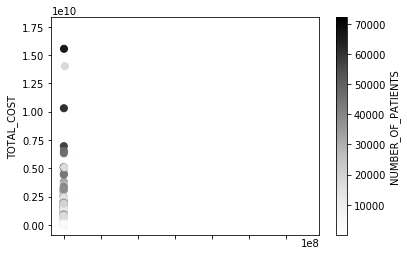

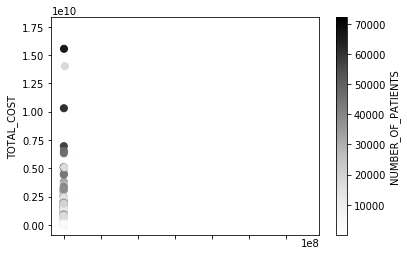

In [9]:
scatterplot()